#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org
    https://docs.python.org
    http://strftime.org/

#### Questions/feedback: petert@digipen.edu

# Time Series
**Naive times and complex times**
- datetime, date, time, timedelta, timezone

**Frequently occuring "times":**
- time stamps, time periods, time intervals, elapsed time

**Conversion between string and date/time:**
- datetime to str and str to datetime
    - str.strftime()
    - datetime.strptime()
- feature conversion to datetime type
    - .to_datetime()

**Time series in pandas:**
- Time as index column
- Time as feature column

**Date ranges and frequencies**
- Generating date ranges
- Frequencies and Offsets

**Rolling Window Functions**
- Moving average

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
%matplotlib inline

Naive dates and times
- datetime: attribute extraction
- datetime.date and datetime.time
- basic arithmetics
- the focus is on attributes
- basic time zone handling

Lets start with printing current date and time:

In [3]:
datetime.now()
(datetime.strptime('2000-03-14 01:59:26', '%Y-%m-%d %H:%M:%S')).strftime('I was born on %B %d, %Y. It was on a %A')

'I was born on March 14, 2000. It was on a Tuesday'

Retrieve attributes of current date and time:

In [3]:
now = datetime.now()
print(now.year)
print(now.month)
print(now.day)
print(now.hour)
print(now.minute)       # don't mix up with .min which stands for minimum
print(now.second)
print(now.microsecond)

2020
10
19
20
2
48
396306


Note: check out what .min and .max does

Few other methods:

In [4]:
print(now.weekday())
print(now.isoweekday())

print(now.ctime())
print(now.astimezone())

0
1
Mon Oct 19 20:02:48 2020
2020-10-19 20:02:48.396306-07:00


Lets check on the type of current date/time:

In [5]:
type(now)

datetime.datetime

Note: datetime is not subscriptable

Now lets store the earliest date/time from year 2020:

In [6]:
datetime(2020, 1, 1, 0, 0, 0, 0)

datetime.datetime(2020, 1, 1, 0, 0)

The remaining time until the new year:

In [7]:
newyear = datetime(2021, 1, 1, 0, 0, 0, 0)
newyear - now

datetime.timedelta(days=73, seconds=14231, microseconds=603694)

The result is datetime.timedelta:

In [8]:
type(newyear - now)

datetime.timedelta

Type wise:

        datetime - datetime = timedelta

It suggests that performing basic arithmetics (like addition) will need more attention:

In [9]:
# below won't work:

# now + 7
# now + datetime.day(7)
# now + now
# now * 2

We need to specify a time difference using *.timedelta()* from *datetime*:

In [10]:
timedelta(days=6, hours=3, minutes=8, seconds=7)

datetime.timedelta(days=6, seconds=11287)

Note that the timedelta of "days, hours, minutes, seconds" was converted to "days, seconds" only

timedelta only has days and seconds attributes (less than datetime):

In [11]:
(timedelta(days=6, hours=3, minutes=8, seconds=7)).days

6

In [12]:
(timedelta(days=6, hours=3, minutes=8, seconds=7)).seconds

11287

Notice that timedelta returns days and seconds even though hours and minutes were also specified.

In [13]:
print("Current date and time:")
print(now)
print("A week later:")
print(now + timedelta(days=7))

Current date and time:
2020-10-19 20:02:48.396306
A week later:
2020-10-26 20:02:48.396306


Note the type of timedelta:

In [14]:
print("The type of timedelta:", type(timedelta(days=7)))

The type of timedelta: <class 'datetime.timedelta'>


Type wise:

    datetime + timedelta = datetime

**Conversion between string and date/time:**
- datetime to str
- str to datetime
- Related methods:
    - str.strftime()
    - datetime.strptime()

Lets convert a string to datetime format:

In [15]:
str_text = '1989-02-24 03:45:22'
print(str_text)
print("The type is:", type(str_text))

# below will result in error:
str_text + timedelta(days=7)

1989-02-24 03:45:22
The type is: <class 'str'>


TypeError: can only concatenate str (not "datetime.timedelta") to str

Expectadly: we could not automatically add a timedelta to a string. We need to convert the string to datetime format.

In [16]:
datetime.strptime(str_text, '%Y-%m-%d %H:%M:%S')

datetime.datetime(1989, 2, 24, 3, 45, 22)

Use .strptime() method ("p" stands for parsing):

In [17]:
datetime_text = datetime.strptime(str_text, '%Y-%m-%d %H:%M:%S')
datetime_text

datetime.datetime(1989, 2, 24, 3, 45, 22)

The conversion was successful.

Now use the result and get a different date/time format of the same datetime using .strftime() method ("f" stands for formatting):

In [18]:
datetime_text.strftime('%m/%d/%Y %H:%M:%S')

'02/24/1989 03:45:22'

In [19]:
datetime_text.strftime('%m/%d/%y %H:%M:%S %A')

'02/24/89 03:45:22 Friday'

***Example:***
You can find out what day of the week you were born.

In [20]:
(datetime.strptime('2000-03-14 01:59:26', '%Y-%m-%d %H:%M:%S')).strftime('I was born on %B %d, %Y. It was on a %A')

'I was born on March 14, 2000. It was on a Tuesday'

STRFTIME codes (from http://strftime.org/):

<table cellpadding="0" cellspacing="0" border="0">
<colgroup>
  <col id="directive">
  <col id="meaning">
  <col id="example">
</colgroup>
<thead>
  <tr>
    <th>Code</th>
    <th>Meaning</th>
    <th>Example</th>
  </tr>
</thead>
<tbody>
    <tr>
      <td><code>%a</code></td>
      <td>Weekday as locale’s abbreviated name.</td>
      <td><code>Mon</code></td>
    </tr>
    <tr>
      <td><code>%A</code></td>
      <td>Weekday as locale’s full name.</td>
      <td><code>Monday</code></td>
    </tr>
    <tr>
      <td><code>%w</code></td>
      <td>Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.</td>
      <td><code>1</code></td>
    </tr>
    <tr>
      <td><code>%d</code></td>
      <td>Day of the month as a zero-padded decimal number.</td>
      <td><code>30</code></td>
    </tr>
    <tr>
      <td><code>%-d</code></td>
      <td>Day of the month as a  decimal number. (Platform specific)</td>
      <td><code>30</code></td>
    </tr>
    <tr>
      <td><code>%b</code></td>
      <td>Month as locale’s abbreviated name.</td>
      <td><code>Sep</code></td>
    </tr>
    <tr>
      <td><code>%B</code></td>
      <td>Month as locale’s full name.</td>
      <td><code>September</code></td>
    </tr>
    <tr>
      <td><code>%m</code></td>
      <td>Month as a zero-padded decimal number.</td>
      <td><code>09</code></td>
    </tr>
    <tr>
      <td><code>%-m</code></td>
      <td>Month as a  decimal number. (Platform specific)</td>
      <td><code>9</code></td>
    </tr>
    <tr>
      <td><code>%y</code></td>
      <td>Year without century as a zero-padded decimal number.</td>
      <td><code>13</code></td>
    </tr>
    <tr>
      <td><code>%Y</code></td>
      <td>Year with century as a decimal number.</td>
      <td><code>2013</code></td>
    </tr>
    <tr>
      <td><code>%H</code></td>
      <td>Hour (24-hour clock) as a zero-padded decimal number.</td>
      <td><code>07</code></td>
    </tr>
    <tr>
      <td><code>%-H</code></td>
      <td>Hour (24-hour clock) as a  decimal number. (Platform specific)</td>
      <td><code>7</code></td>
    </tr>
    <tr>
      <td><code>%I</code></td>
      <td>Hour (12-hour clock) as a zero-padded decimal number.</td>
      <td><code>07</code></td>
    </tr>
    <tr>
      <td><code>%-I</code></td>
      <td>Hour (12-hour clock) as a  decimal number. (Platform specific)</td>
      <td><code>7</code></td>
    </tr>
    <tr>
      <td><code>%p</code></td>
      <td>Locale’s equivalent of either AM or PM.</td>
      <td><code>AM</code></td>
    </tr>
    <tr>
      <td><code>%M</code></td>
      <td>Minute as a zero-padded decimal number.</td>
      <td><code>06</code></td>
    </tr>
    <tr>
      <td><code>%-M</code></td>
      <td>Minute as a  decimal number. (Platform specific)</td>
      <td><code>6</code></td>
    </tr>
    <tr>
      <td><code>%S</code></td>
      <td>Second as a zero-padded decimal number.</td>
      <td><code>05</code></td>
    </tr>
    <tr>
      <td><code>%-S</code></td>
      <td>Second as a  decimal number. (Platform specific)</td>
      <td><code>5</code></td>
    </tr>
    <tr>
      <td><code>%f</code></td>
      <td>Microsecond as a decimal number, zero-padded on the left.</td>
      <td><code>000000</code></td>
    </tr>
    <tr>
      <td><code>%z</code></td>
      <td>UTC offset in the form +HHMM or -HHMM (empty string if the the object is naive).</td>
      <td><code></code></td>
    </tr>
    <tr>
      <td><code>%Z</code></td>
      <td>Time zone name (empty string if the object is naive).</td>
      <td><code></code></td>
    </tr>
    <tr>
      <td><code>%j</code></td>
      <td>Day of the year as a zero-padded decimal number.</td>
      <td><code>273</code></td>
    </tr>
    <tr>
      <td><code>%-j</code></td>
      <td>Day of the year as a  decimal number. (Platform specific)</td>
      <td><code>273</code></td>
    </tr>
    <tr>
      <td><code>%U</code></td>
      <td>Week number of the year (Sunday as the first day of the week) as a zero padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0.</td>
      <td><code>39</code></td>
    </tr>
    <tr>
      <td><code>%W</code></td>
      <td>Week number of the year (Monday as the first day of the week) as a decimal number. All days in a new year preceding the first Monday are considered to be in week 0.</td>
      <td><code>39</code></td>
    </tr>
    <tr>
      <td><code>%c</code></td>
      <td>Locale’s appropriate date and time representation.</td>
      <td><code>Mon Sep 30 07:06:05 2013</code></td>
    </tr>
    <tr>
      <td><code>%x</code></td>
      <td>Locale’s appropriate date representation.</td>
      <td><code>09/30/13</code></td>
    </tr>
    <tr>
      <td><code>%X</code></td>
      <td>Locale’s appropriate time representation.</td>
      <td><code>07:06:05</code></td>
    </tr>
    <tr>
      <td><code>%%</code></td>
      <td>A literal '%' character.</td>
      <td><code>%</code></td>
    </tr>
</tbody>
</table>

***Example:***

Lets convert a feature to datetime

In [21]:
# import data into dataframe
df_sample = pd.read_csv("df_sample.csv")
df_sample.head()

,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,9900641,FD6A1181E0775BAB364BCC2F85E68202,3DB3C7FA79C48DC996093C9BB5524C90,CMT,2,N,2013-02-11 06:46:50,2013-02-11 07:18:33,2,1902,16.10,-73.976471,40.744869,-73.782478,40.648815
1,4366405,DA2617C774E1C173F1F688500A03EC6A,0C9B95E3059720DDF3CB8B1A43057ABC,CMT,1,N,2013-02-28 13:24:03,2013-02-28 13:39:40,1,936,2.00,-73.999069,40.719170,-74.005203,40.740665
2,8902938,F7F570E1A4FB56F811260B181653D91A,DC51C25579775925CD83C35DC2474083,CMT,1,N,2013-02-07 15:19:31,2013-02-07 15:22:54,1,203,0.30,-73.963882,40.765438,-73.969406,40.768372
3,3554704,C901F6F260BB825D6ADA7BBA82EDCDAF,E81AB910D7ED1E06E56BD97F80E50A09,VTS,1,NaN,2013-02-19 17:50:00,2013-02-19 17:59:00,1,540,1.99,-74.009880,40.721348,-74.005074,40.742733
4,10853369,F6E9B6D3636B7357A87D71BC71C5B36F,D9F0CE02744C215B23AAD18842801788,CMT,1,N,2013-02-22 05:25:01,2013-02-22 05:40:25,2,923,8.70,-73.985062,40.744160,-73.883621,40.775604


In [22]:
# check on the data type of features
df_sample.dtypes

Unnamed: 0              int64
medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

Note the "pickup_datetime" and "dropoff_datetime" are not date/time types

Checking the type of individual values:

In [23]:
df_sample.loc[2,'pickup_datetime']

'2013-02-07 15:19:31'

In [24]:
type(df_sample.loc[2,'pickup_datetime'])

str

Try importing as datetime:

In [25]:
df_sample = pd.read_csv("df_sample.csv", parse_dates=True)
df_sample.dtypes

Unnamed: 0              int64
medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

Notice there is no change, the parser did not work.

If a feature cannot be parsed as a date/time/datetime, the entire feature will be returned unaltered and as an object data type.

Use pandas .to_datetime() method

In [26]:
pd.to_datetime(df_sample['pickup_datetime'])

0     2013-02-11 06:46:50
1     2013-02-28 13:24:03
2     2013-02-07 15:19:31
3     2013-02-19 17:50:00
4     2013-02-22 05:25:01
              ...        
134   2013-02-21 04:53:00
135   2013-02-20 19:17:00
136   2013-02-02 10:41:38
137   2013-02-04 12:26:14
138   2013-02-08 14:44:00
Name: pickup_datetime, Length: 139, dtype: datetime64[ns]

In [27]:
df_sample.dtypes

Unnamed: 0              int64
medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

The feature's type is now datetime

Use an assignment to actually apply the change:

In [28]:
df_sample['pickup_datetime'] = pd.to_datetime(df_sample['pickup_datetime'])
df_sample.dtypes

Unnamed: 0                     int64
medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
store_and_fwd_flag            object
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
dtype: object

Now the feature can be utilized as a datetime type, for example the format can be changed:

In [29]:
df_sample.head()

,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,9900641,FD6A1181E0775BAB364BCC2F85E68202,3DB3C7FA79C48DC996093C9BB5524C90,CMT,2,N,2013-02-11 06:46:50,2013-02-11 07:18:33,2,1902,16.10,-73.976471,40.744869,-73.782478,40.648815
1,4366405,DA2617C774E1C173F1F688500A03EC6A,0C9B95E3059720DDF3CB8B1A43057ABC,CMT,1,N,2013-02-28 13:24:03,2013-02-28 13:39:40,1,936,2.00,-73.999069,40.719170,-74.005203,40.740665
2,8902938,F7F570E1A4FB56F811260B181653D91A,DC51C25579775925CD83C35DC2474083,CMT,1,N,2013-02-07 15:19:31,2013-02-07 15:22:54,1,203,0.30,-73.963882,40.765438,-73.969406,40.768372
3,3554704,C901F6F260BB825D6ADA7BBA82EDCDAF,E81AB910D7ED1E06E56BD97F80E50A09,VTS,1,NaN,2013-02-19 17:50:00,2013-02-19 17:59:00,1,540,1.99,-74.009880,40.721348,-74.005074,40.742733
4,10853369,F6E9B6D3636B7357A87D71BC71C5B36F,D9F0CE02744C215B23AAD18842801788,CMT,1,N,2013-02-22 05:25:01,2013-02-22 05:40:25,2,923,8.70,-73.985062,40.744160,-73.883621,40.775604


In [30]:
# below would create the feature as expected but would place it at the very end
#df_sample['pickup_date'] = df_sample.loc[:,'pickup_datetime'].dt.strftime('%Y/%m/%d')

In [31]:
df_sample.insert(6, 'pickup_date', df_sample.loc[:,'pickup_datetime'].dt.strftime('%Y/%m/%d'))
df_sample.head()

,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_date,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,9900641,FD6A1181E0775BAB364BCC2F85E68202,3DB3C7FA79C48DC996093C9BB5524C90,CMT,2,N,2013/02/11,2013-02-11 06:46:50,2013-02-11 07:18:33,2,1902,16.10,-73.976471,40.744869,-73.782478,40.648815
1,4366405,DA2617C774E1C173F1F688500A03EC6A,0C9B95E3059720DDF3CB8B1A43057ABC,CMT,1,N,2013/02/28,2013-02-28 13:24:03,2013-02-28 13:39:40,1,936,2.00,-73.999069,40.719170,-74.005203,40.740665
2,8902938,F7F570E1A4FB56F811260B181653D91A,DC51C25579775925CD83C35DC2474083,CMT,1,N,2013/02/07,2013-02-07 15:19:31,2013-02-07 15:22:54,1,203,0.30,-73.963882,40.765438,-73.969406,40.768372
3,3554704,C901F6F260BB825D6ADA7BBA82EDCDAF,E81AB910D7ED1E06E56BD97F80E50A09,VTS,1,NaN,2013/02/19,2013-02-19 17:50:00,2013-02-19 17:59:00,1,540,1.99,-74.009880,40.721348,-74.005074,40.742733
4,10853369,F6E9B6D3636B7357A87D71BC71C5B36F,D9F0CE02744C215B23AAD18842801788,CMT,1,N,2013/02/22,2013-02-22 05:25:01,2013-02-22 05:40:25,2,923,8.70,-73.985062,40.744160,-73.883621,40.775604


**Date ranges and frequencies**
- Generating date ranges
- Specify frequency and periods

Example using .date_range() method:

In [32]:
# specify two dates as a range
index = pd.date_range('2020-10-19', '2020-12-09')
index

DatetimeIndex(['2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'],
              dtype='datetime64[ns]', freq='D')

Note that the frequency is daily by default

Lets change that to weekly:

In [33]:
index = pd.date_range('2019-11-05', '2019-12-12', freq='W')
index

DatetimeIndex(['2019-11-10', '2019-11-17', '2019-11-24', '2019-12-01',
               '2019-12-08'],
              dtype='datetime64[ns]', freq='W-SUN')

We can further specify which day the weekly frequency can start:

In [34]:
index = pd.date_range('2020-10-19', '2020-12-09', freq='W-MON')
index

DatetimeIndex(['2020-10-19', '2020-10-26', '2020-11-02', '2020-11-09',
               '2020-11-16', '2020-11-23', '2020-11-30', '2020-12-07'],
              dtype='datetime64[ns]', freq='W-MON')

If we only specify the start then need to pass a number of periods:

In [35]:
index = pd.date_range('2020-10-19', freq='D', periods=52)
index

DatetimeIndex(['2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'],
              dtype='datetime64[ns]', freq='D')

Note that the date time input was considered as a start time.

Lets specify the end time and the number of periods:

In [36]:
index = pd.date_range(end='2020-12-09', freq='D', periods=52)
index

DatetimeIndex(['2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26',
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07',
               '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'],
              dtype='datetime64[ns]', freq='D')

Even more complex frequency can be specified.

Example for listing all Patch Tuesdays until the end of next year:

In [37]:
index = pd.date_range(start='2020-01-01', end='2020-12-31', freq='WOM-2TUE')
index

DatetimeIndex(['2020-01-14', '2020-02-11', '2020-03-10', '2020-04-14',
               '2020-05-12', '2020-06-09', '2020-07-14', '2020-08-11',
               '2020-09-08', '2020-10-13', '2020-11-10', '2020-12-08'],
              dtype='datetime64[ns]', freq='WOM-2TUE')

***Example:***

Create a dataframe as a time series using the index as the time and one feature measuring a levitating object's height:

In [38]:
index = pd.date_range(start='2020-10-19 20:30:00 ', freq='min', periods=80)
index

DatetimeIndex(['2020-10-19 20:30:00', '2020-10-19 20:31:00',
               '2020-10-19 20:32:00', '2020-10-19 20:33:00',
               '2020-10-19 20:34:00', '2020-10-19 20:35:00',
               '2020-10-19 20:36:00', '2020-10-19 20:37:00',
               '2020-10-19 20:38:00', '2020-10-19 20:39:00',
               '2020-10-19 20:40:00', '2020-10-19 20:41:00',
               '2020-10-19 20:42:00', '2020-10-19 20:43:00',
               '2020-10-19 20:44:00', '2020-10-19 20:45:00',
               '2020-10-19 20:46:00', '2020-10-19 20:47:00',
               '2020-10-19 20:48:00', '2020-10-19 20:49:00',
               '2020-10-19 20:50:00', '2020-10-19 20:51:00',
               '2020-10-19 20:52:00', '2020-10-19 20:53:00',
               '2020-10-19 20:54:00', '2020-10-19 20:55:00',
               '2020-10-19 20:56:00', '2020-10-19 20:57:00',
               '2020-10-19 20:58:00', '2020-10-19 20:59:00',
               '2020-10-19 21:00:00', '2020-10-19 21:01:00',
               '2020-10-

Now we have one minute time stamps during our class.

Create a somewhat elevating set of values for every minute.

In [39]:
# create a range between 1 and 80
x = np.arange(1,81)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [40]:
# create 80 random numbers in the same range
t = np.random.randint(1,81,80)
t

array([21, 12, 64, 38, 30, 54, 35, 40,  8,  6, 34, 39, 52,  1, 59, 28, 75,
       27, 25, 58, 42, 46, 72, 36, 39, 27, 26,  4, 79, 44,  1,  3, 24, 31,
       29, 18, 74, 78, 23, 10, 60, 24, 17, 64, 11, 41, 71,  8, 18, 68, 45,
       23, 38, 15,  2, 62,  5, 68, 50, 31,  2, 16, 70, 62, 36, 57,  7, 28,
       62, 39, 15,  1, 75, 32, 17,  5, 44, 30, 41, 73])

In [41]:
# combine x and t to get the noisy but mostly elevating levitation heights
y = abs(x + (np.random.randint(2)*2-1)*t)
y

array([20, 10, 61, 34, 25, 48, 28, 32,  1,  4, 23, 27, 39, 13, 44, 12, 58,
        9,  6, 38, 21, 24, 49, 12, 14,  1,  1, 24, 50, 14, 30, 29,  9,  3,
        6, 18, 37, 40, 16, 30, 19, 18, 26, 20, 34,  5, 24, 40, 31, 18,  6,
       29, 15, 39, 53,  6, 52, 10,  9, 29, 59, 46,  7,  2, 29,  9, 60, 40,
        7, 31, 56, 71,  2, 42, 58, 71, 33, 48, 38,  7])

In [42]:
# create a dataframe with a single feature and the index as a time series and index of the dataframe:
df = pd.DataFrame(y, index, columns=['height'])
df.head()

,height
2020-10-19 20:30:00,20
2020-10-19 20:31:00,10
2020-10-19 20:32:00,61
2020-10-19 20:33:00,34
2020-10-19 20:34:00,25


Simply plot:

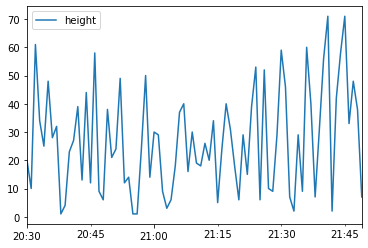

In [43]:
df.plot()
plt.show()

Notice the time ticks on x-axis

**Rolling Window Functions**
- Moving average

Example using .rolling() method:

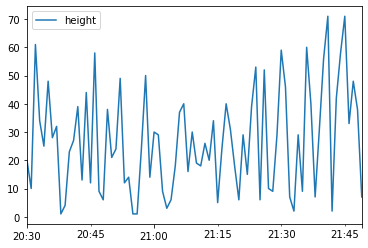

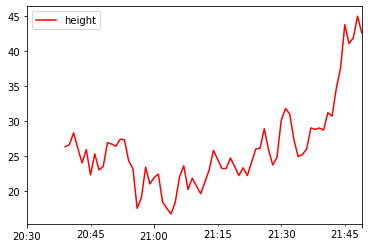

In [44]:
df.plot()
df.rolling(10).mean().plot(color="r")
plt.show()

Display the lines in one plot:

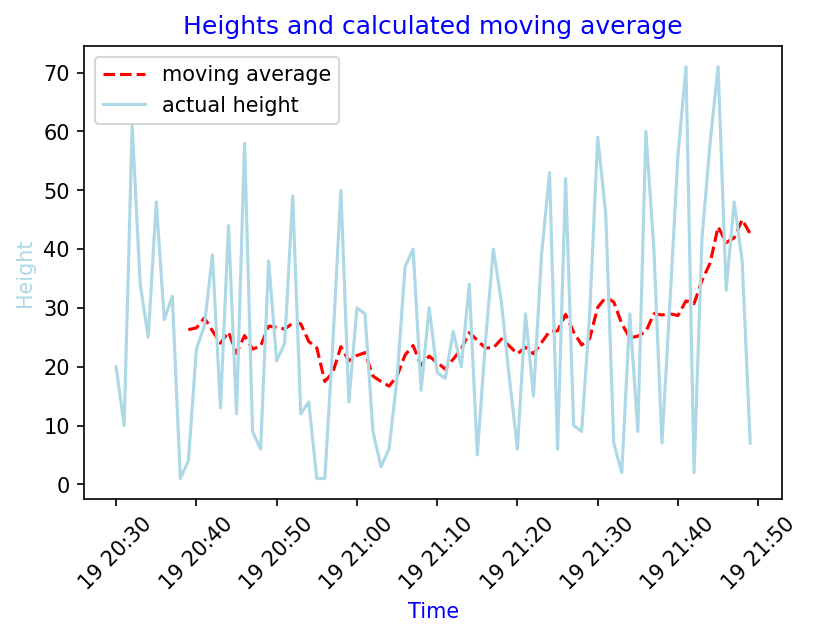

In [45]:
plt.figure(dpi=150)
plt.plot(index, df.rolling(10).mean(), color="red", linestyle="--")
plt.plot(df, color="lightblue")
plt.xticks(rotation=45)
plt.legend(['moving average', 'actual height'])
plt.title('Heights and calculated moving average', color="blue")
plt.ylabel('Height', color="lightblue")
plt.xlabel('Time', color="blue")
plt.show()

Note the special cases at rolling = 1 and rolling = 80

Now let's loop through the size of the rolling window:

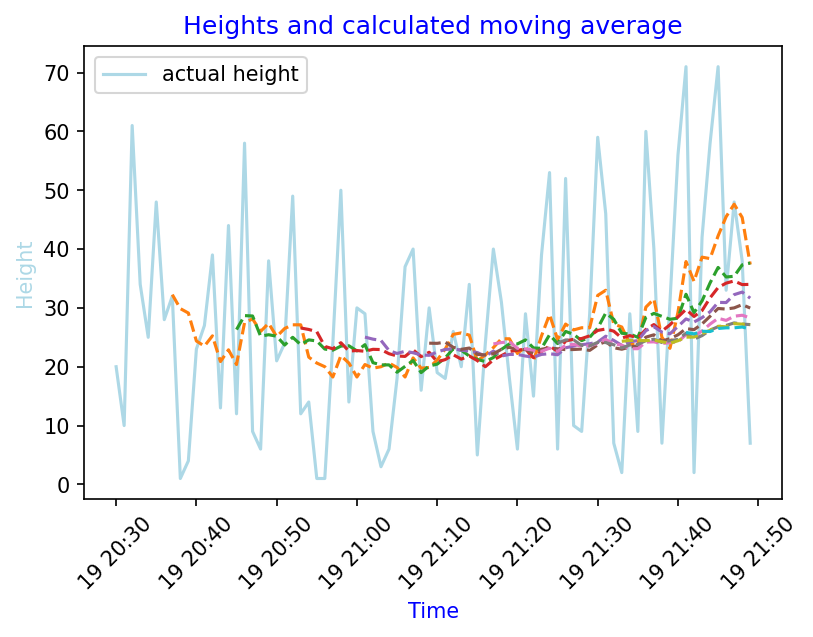

In [46]:
plt.figure(dpi=150)
plt.plot(df, color="lightblue")
for i in range(0,80,8):
    plt.plot(index, df.rolling(i).mean(), linestyle="--")
    #time.sleep(0.1)

plt.xticks(rotation=45)
plt.legend(['actual height'])
plt.title('Heights and calculated moving average', color="blue")
plt.ylabel('Height', color="lightblue")
plt.xlabel('Time', color="blue")
plt.show()


#### Homework 17.1:

Calculate remaining days and time until the next St. Patrick Day

Display:
 - Current Date and Time
 - Next St. Patricks Day's date using Years, Month, Day and Weekday
 - Remaining time left in: Days, Hours, Minutes, Seconds and Microseconds
 
Extra:
- use a counter which refreshing in place at every second or minute

In [ ]:
# Homework 17.1 code comes here:



#### Homework 17.2:

Create a time series dataframe describing the properties of a vertically thrown object from the ground
The formula describing the object is:
\begin{equation}
y = \frac{1}{2}at^2 + v_0 t + y_0
\end{equation}
where: y = height, a = acceleration due to gravity, v<sub>0</sub> = initial velocity, y<sub>0</sub> = initial height

in our case: a = -20, v<sub>0</sub> = 100, y<sub>0</sub> = 0

\begin{equation}
y = -\frac{1}{2}20t^2 + 100t = 100t -10t^2
\end{equation}

- Generate second long timestamps
- Create a feature which will have values corresponding to the object's height in the i<sup>th</sup> second (index i<sup>th</sup> row)
- plot the height in time

Extra:
- find the generic formula for thrown object
- create all possible features (height, distance, speed, etc)
- plot all the features in time

In [ ]:
# Homework 17.2 code comes here:

